<a href="https://colab.research.google.com/github/VergaraC/ProjetoSuperComp/blob/main/Relatorio/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import pandas as pd
import time
import subprocess
import pickle
from mpl_toolkits.mplot3d import Axes3D


Overwriting parallelCPU.cpp


In [11]:
%%bash 

g++ -fopenmp parallelCPU.cpp -o paraleloexaus 


parallelCPU.cpp: In function ‘int main()’:
parallelCPU.cpp:55:16: error: found ‘:’ in nested-name-specifier, expected ‘::’
     for(auto&s1: seq1All){
                ^
parallelCPU.cpp:55:14: error: ‘s1’ has not been declared
     for(auto&s1: seq1All){
              ^~
parallelCPU.cpp:55:25: error: qualified-id in declaration before ‘)’ token
     for(auto&s1: seq1All){
                         ^
parallelCPU.cpp:55:25: error: expected ‘=’ before ‘)’ token
parallelCPU.cpp:67:5: error: expected ‘;’ before ‘cout’
     cout << "Max Score:  " << bestScore << endl;
     ^~~~
parallelCPU.cpp:68:44: error: expected ‘)’ before ‘;’ token
     cout << "Best Seq1:  " << best1 << endl;
                                            ^
parallelCPU.cpp:55:5: error: expected iteration declaration or initialization
     for(auto&s1: seq1All){
     ^~~


In [2]:
algoritimos = ["./exaustiva", "./random", "./smithWaterman", "./paraleloexaus", "./exaustivaSmithWaterman"]

In [4]:
#def createDnaSequences():
nao rodar novamente
seqList= list()
i=0
for n in range(100, 2500, 300):
   for m in range(100, 2500, 300):
        #file = "dna" + str(n) + "-" + str(m) + "-" + str(i)
        file = "dna"+ str(i)
        print(file)
        f = open(file, 'w')


        seq=[str(n)+'\n',
             str(m)+'\n',
             ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
             ''.join(random.choices(['A','T','C','G','-'],k=m))]
        f.writelines(seq)
        f.close()
        #seqList.append(seq)
        i += 1
print(i)
        
    #return seqList

dna0
dna1
dna2
dna3
dna4
dna5
dna6
dna7
dna8
dna9
dna10
dna11
dna12
dna13
dna14
dna15
dna16
dna17
dna18
dna19
dna20
dna21
dna22
dna23
dna24
dna25
dna26
dna27
dna28
dna29
dna30
dna31
dna32
dna33
dna34
dna35
dna36
dna37
dna38
dna39
dna40
dna41
dna42
dna43
dna44
dna45
dna46
dna47
dna48
dna49
dna50
dna51
dna52
dna53
dna54
dna55
dna56
dna57
dna58
dna59
dna60
dna61
dna62
dna63
64


In [3]:
def roda_com_entrada(ex, in_f):
    with open(in_f) as f:
        start = time.perf_counter()
        proc = subprocess.run([ex], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()

    return end-start

In [7]:
#timeExaustiva = list()
#timeLocal = list()
timeSmithWaterman = list()
#timeParallelLocal = list()
#timeParallelExaustivaSmithWaterman = list()
i = 63
i2 = 1

while i2<=i :
    seq = "dna" + str(i2)
    '''t1 = roda_com_entrada(algoritimos[0], seq)
    timeExaustiva.append(t1)
    t2 = roda_com_entrada(algoritimos[1], seq)
    timeLocal.append(t2)'''
    t3 = roda_com_entrada(algoritimos[2], seq)
    timeSmithWaterman.append(t3)
    print("I ", i2, " de ", i, " rodado")
    i2 += 1

I  1  de  63  rodado
I  2  de  63  rodado
I  3  de  63  rodado
I  4  de  63  rodado
I  5  de  63  rodado
I  6  de  63  rodado
I  7  de  63  rodado
I  8  de  63  rodado
I  9  de  63  rodado
I  10  de  63  rodado
I  11  de  63  rodado
I  12  de  63  rodado
I  13  de  63  rodado
I  14  de  63  rodado
I  15  de  63  rodado
I  16  de  63  rodado
I  17  de  63  rodado
I  18  de  63  rodado
I  19  de  63  rodado
I  20  de  63  rodado
I  21  de  63  rodado
I  22  de  63  rodado
I  23  de  63  rodado
I  24  de  63  rodado
I  25  de  63  rodado
I  26  de  63  rodado
I  27  de  63  rodado
I  28  de  63  rodado
I  29  de  63  rodado
I  30  de  63  rodado
I  31  de  63  rodado
I  32  de  63  rodado
I  33  de  63  rodado
I  34  de  63  rodado
I  35  de  63  rodado
I  36  de  63  rodado
I  37  de  63  rodado
I  38  de  63  rodado
I  39  de  63  rodado
I  40  de  63  rodado
I  41  de  63  rodado
I  42  de  63  rodado
I  43  de  63  rodado
I  44  de  63  rodado
I  45  de  63  rodado
I  46  de  63  roda

In [6]:
timeExaustiva = list()
#timeLocal = list()
#timeSmithWaterman = list()
#timeParallelLocal = list()
#timeParallelExaustivaSmithWaterman = list()
i = 63
i2 = 1

while i2<= i :
    seq = "dna" + str(i2)
    t1 = roda_com_entrada(algoritimos[0], seq)
    timeExaustiva.append(t1)
    '''
    t2 = roda_com_entrada(algoritimos[1], seq)
    timeLocal.append(t2)
    t3 = roda_com_entrada(algoritimos[2], seq)
    timeSmithWaterman.append(t3)'''
    print("I ", i2, " de ", i, " rodado")
    i2 += 1

I  1  de  63  rodado
I  2  de  63  rodado


KeyboardInterrupt: 

In [17]:
#timeExaustiva = list()
timeLocal = list()
#timeSmithWaterman = list()
#timeParallelLocal = list()
#timeParallelExaustivaSmithWaterman = list()
i = 63
i2 = 1

while i2 <= i :
    seq = "dna" + str(i2)
    '''t1 = roda_com_entrada(algoritimos[0], seq)
    timeExaustiva.append(t1)
    '''
    t2 = roda_com_entrada(algoritimos[1], seq)
    timeLocal.append(t2)
    '''t3 = roda_com_entrada(algoritimos[2], seq)
    timeSmithWaterman.append(t3)'''
    print("I ", i2, " de ", i, " rodado")
    i2 += 1

I  1  de  63  rodado
I  2  de  63  rodado
I  3  de  63  rodado
I  4  de  63  rodado
I  5  de  63  rodado
I  6  de  63  rodado
I  7  de  63  rodado
I  8  de  63  rodado
I  9  de  63  rodado
I  10  de  63  rodado
I  11  de  63  rodado
I  12  de  63  rodado
I  13  de  63  rodado
I  14  de  63  rodado
I  15  de  63  rodado
I  16  de  63  rodado
I  17  de  63  rodado
I  18  de  63  rodado
I  19  de  63  rodado
I  20  de  63  rodado
I  21  de  63  rodado
I  22  de  63  rodado
I  23  de  63  rodado
I  24  de  63  rodado
I  25  de  63  rodado
I  26  de  63  rodado
I  27  de  63  rodado
I  28  de  63  rodado
I  29  de  63  rodado
I  30  de  63  rodado
I  31  de  63  rodado
I  32  de  63  rodado
I  33  de  63  rodado
I  34  de  63  rodado
I  35  de  63  rodado
I  36  de  63  rodado
I  37  de  63  rodado
I  38  de  63  rodado
I  39  de  63  rodado
I  40  de  63  rodado
I  41  de  63  rodado
I  42  de  63  rodado
I  43  de  63  rodado
I  44  de  63  rodado
I  45  de  63  rodado
I  46  de  63  roda

In [9]:
# resultados do smithwaterman estao na lista errada
#print(len(timeSmithWaterman))
tamanho1Utilizado = list()
tamanho2Utilizado = list()
i3 = 0
for s1 in range(100, 2500, 300):
   for s2 in range(100, 2500, 300):
        tamanho1Utilizado.append(s1)
        tamanho2Utilizado.append(s2)
        print(s1, "  ", s2)
        i3+= 1
print(i3)


100    100
100    400
100    700
100    1000
100    1300
100    1600
100    1900
100    2200
400    100
400    400
400    700
400    1000
400    1300
400    1600
400    1900
400    2200
700    100
700    400
700    700
700    1000
700    1300
700    1600
700    1900
700    2200
1000    100
1000    400
1000    700
1000    1000
1000    1300
1000    1600
1000    1900
1000    2200
1300    100
1300    400
1300    700
1300    1000
1300    1300
1300    1600
1300    1900
1300    2200
1600    100
1600    400
1600    700
1600    1000
1600    1300
1600    1600
1600    1900
1600    2200
1900    100
1900    400
1900    700
1900    1000
1900    1300
1900    1600
1900    1900
1900    2200
2200    100
2200    400
2200    700
2200    1000
2200    1300
2200    1600
2200    1900
2200    2200
64


Text(0.5, 0.92, 'Heuristica Smith-Waterman')

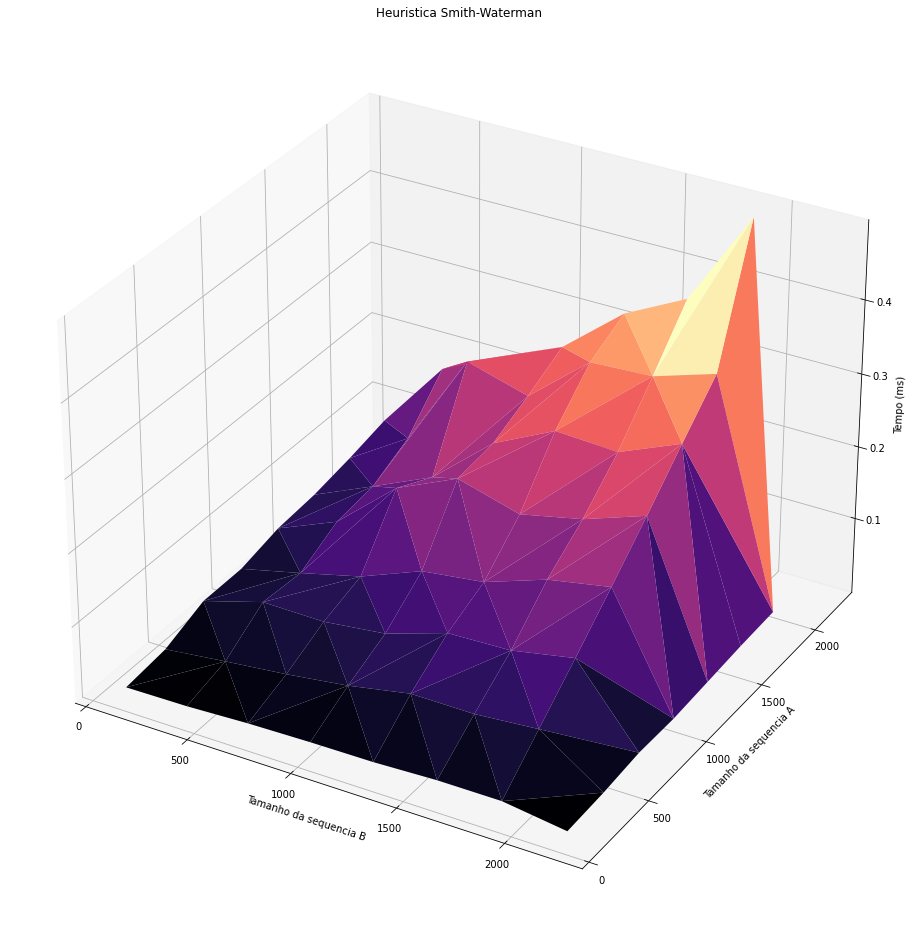

In [16]:

fig = plt.figure(figsize=(55,30))
heuristica_graph = fig.add_subplot(133, projection='3d')
heuristica_graph.plot_trisurf(tamanho2Utilizado[0:-1], tamanho1Utilizado[0:-1], timeSmithWaterman,cmap='magma')
heuristica_graph.set_xlabel('Tamanho da sequencia B')
heuristica_graph.set_ylabel('Tamanho da sequencia A')
heuristica_graph.set_zlabel('Tempo (ms)')
heuristica_graph.set_title('Heuristica Smith-Waterman')

Text(0.5, 0.92, 'Busca Local')

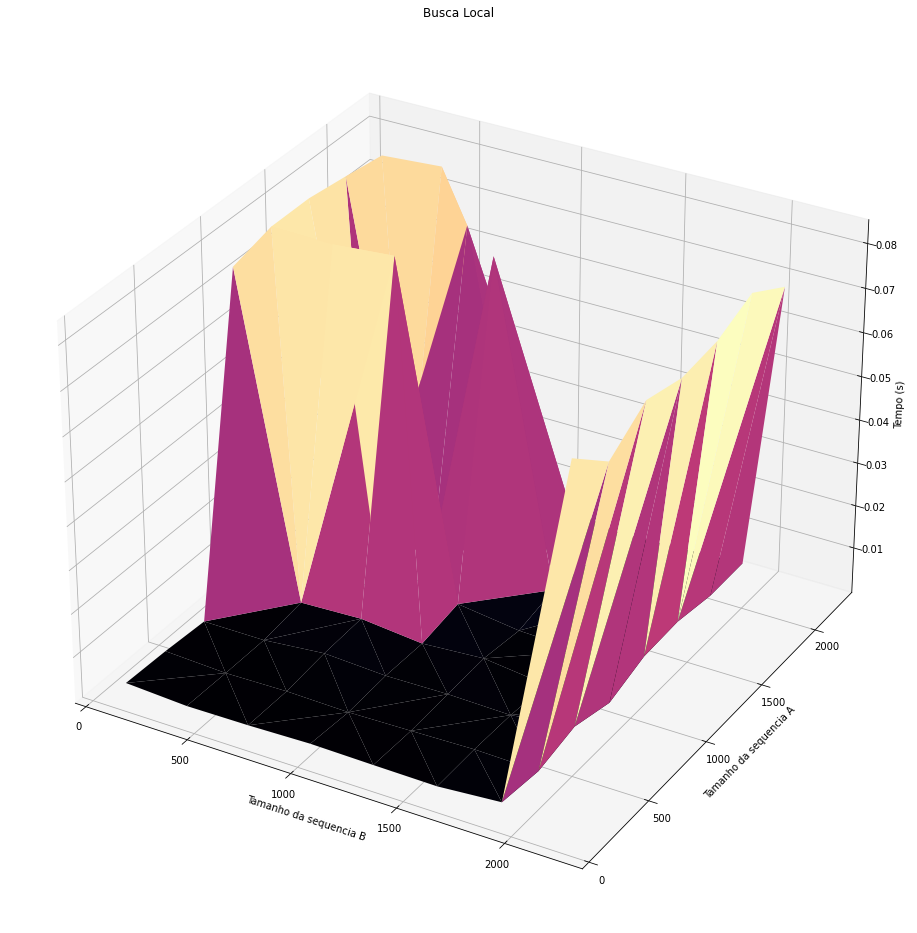

In [18]:

fig = plt.figure(figsize=(55,30))
heuristica_graph = fig.add_subplot(133, projection='3d')
heuristica_graph.plot_trisurf(tamanho2Utilizado[0:-1], tamanho1Utilizado[0:-1], timeLocal,cmap='magma')
heuristica_graph.set_xlabel('Tamanho da sequencia B')
heuristica_graph.set_ylabel('Tamanho da sequencia A')
heuristica_graph.set_zlabel('Tempo (s)')
heuristica_graph.set_title('Busca Local')

In [ ]:
print(len(tamanho2Utilizado))
print(len(tamanho1Utilizado))
print(len(timeExaustiva))
fig = plt.figure(figsize=(55,30))
heuristica_graph = fig.add_subplot(133, projection='3d')
heuristica_graph.plot_trisurf(tamanho2Utilizado, tamanho1Utilizado, timeExaustiva,cmap='magma')
heuristica_graph.set_xlabel('Tamanho da sequencia B')
heuristica_graph.set_ylabel('Tamanho da sequencia A')
heuristica_graph.set_zlabel('Tempo (s)')
heuristica_graph.set_title('Busca Exaustiva')

## Smith Waterman ##

A Heurística de Smith-WaterMan é uma boa solução caso queira um balanço entre acurácia e tempo para rodar o algoritimo. O problema de utilizar essa heurística é que ela cria uma matriz m X n (tamanho da primeira sequência X tamanho da segunda sequência), assim para sequências muito grandes a matriz fica muito grande, assim pode gerar um problema para paralelizar o algoritimo, especialmente em GPUs, visto que a memória ocupada pela matriz acaba sendo muito grande podendo passar da memória para os cores.

## Busca Local ##

A Busca Local é a solução mais rápida, mas por utilizar aleatoriedade o seu resultado não é confiável 

## Busca Exaustiva ##

A Busca Exaustiva sempre retorna o resultado correto, visto que compara todas as possibilidades, com isso esssa busca é a mais demorada

In [20]:
#timeExaustiva = list()
#timeLocal = list()
#timeSmithWaterman = list()
timeParallelLocal = list()
#timeParallelExaustivaSmithWaterman = list()
i = 63
i2 = 1

while i2 <= i :
    seq = "dna" + str(i2)
    '''t1 = roda_com_entrada(algoritimos[0], seq)
    timeExaustiva.append(t1)
    
    t2 = roda_com_entrada(algoritimos[1], seq)
    timeLocal.append(t2)
    t3 = roda_com_entrada(algoritimos[2], seq)
    timeSmithWaterman.append(t3)'''
    t4 = roda_com_entrada(algoritimos[3], seq)
    timeParallelLocal.append(t4)
    print("I ", i2, " de ", i, " rodado")
    i2 += 1

I  1  de  63  rodado
I  2  de  63  rodado
I  3  de  63  rodado
I  4  de  63  rodado
I  5  de  63  rodado
I  6  de  63  rodado
I  7  de  63  rodado
I  8  de  63  rodado
I  9  de  63  rodado
I  10  de  63  rodado
I  11  de  63  rodado
I  12  de  63  rodado
I  13  de  63  rodado
I  14  de  63  rodado
I  15  de  63  rodado
I  16  de  63  rodado
I  17  de  63  rodado
I  18  de  63  rodado
I  19  de  63  rodado
I  20  de  63  rodado
I  21  de  63  rodado
I  22  de  63  rodado


In [ ]:
#timeExaustiva = list()
#timeLocal = list()
#timeSmithWaterman = list()
#timeParallelLocal = list()
timeParallelExaustivaSmithWaterman = list()
i = 63
i2 = 1

while i2 <= i :
    seq = "dna" + str(i2)
    '''t1 = roda_com_entrada(algoritimos[0], seq)
    timeExaustiva.append(t1)
    
    t2 = roda_com_entrada(algoritimos[1], seq)
    timeLocal.append(t2)
    t3 = roda_com_entrada(algoritimos[2], seq)
    timeSmithWaterman.append(t3)
    t4 = roda_com_entrada(algoritimos[1], seq)
    timeParallelLocal.append(t2)'''
    t5 = roda_com_entrada(algoritimos[1], seq)
    timeParallelLocal.append(t5)
    print("I ", i2, " de ", i, " rodado")
    i2 += 1

In [ ]:
print(len(tamanho2Utilizado))
print(len(tamanho1Utilizado))
print(len(timeParallelLocal))
fig = plt.figure(figsize=(55,30))
heuristica_graph = fig.add_subplot(133, projection='3d')
heuristica_graph.plot_trisurf(tamanho2Utilizado, tamanho1Utilizado, timeParallelLocal,cmap='magma')
heuristica_graph.set_xlabel('Tamanho da sequencia B')
heuristica_graph.set_ylabel('Tamanho da sequencia A')
heuristica_graph.set_zlabel('Tempo (ms)')
heuristica_graph.set_title('Busca exaustiva na CPU')

In [ ]:
fig = plt.figure(figsize=(55,30))
heuristica_graph = fig.add_subplot(133, projection='3d')
heuristica_graph.plot_trisurf(tamanho2Utilizado, tamanho1Utilizado, timeParallelExaustivaSmithWaterman,cmap='magma')
heuristica_graph.set_xlabel('Tamanho da sequencia B')
heuristica_graph.set_ylabel('Tamanho da sequencia A')
heuristica_graph.set_zlabel('Tempo (ms)')
heuristica_graph.set_title('Busca Exaustiva com Heuristica Smith-Waterman')

## Busca Exaustiva Paralelizada na CPU ##



## Busca Exaustiva Com Heurística de Smith-Waterman ##

